Kuo Yang, Lab 7A, 11/23/25  
CS 121/Python DSML  
East Los Angeles College, FA 2025

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [60]:
#read in csv, filter for USA ONLY
df=pd.read_csv('sales_data_sample.csv',encoding='latin1')
dfusa=df[df['COUNTRY']=='USA']

In [61]:
dfusa.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small


In [62]:
# 2. Define input (X) and output (y)
X = dfusa[['QUANTITYORDERED', 'PRICEEACH','MSRP']]
y = dfusa['SALES']


In [63]:
# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [64]:
# 4. Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
# 5. Make predictions
predictions = model.predict(X_test)

In [66]:
# 6. Evaluate the model
print("MSE:", mean_squared_error(y_test, predictions))
print("R²:", r2_score(y_test, predictions))

MSE: 609674.3764489336
R²: 0.8249404651523543


In [67]:
# Save the model to a file
with open("grade_model.pkl", "wb") as file:
    pickle.dump(model, file)

Fitted Linear Regression Equation

In [68]:
# Get the coefficients
qty_coef = model.coef_[0]
price_coef =  model.coef_[1]
msrp_coef =  model.coef_[2]

intercept = model.intercept_

# Print the model's formula
print(f"sales = {qty_coef:.2f} × Quantity + {price_coef:.2f} × Price + {msrp_coef:.2f} × MSRP + {intercept:.2f}")

sales = 104.95 × Quantity + 39.01 × Price + 15.84 × MSRP + -4990.67


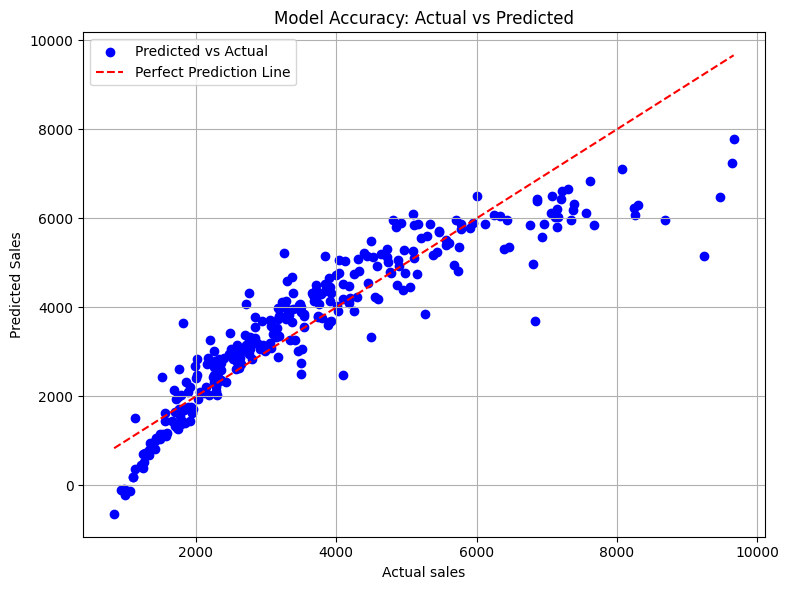

In [69]:
actual = y_test.values

plt.figure(figsize=(8, 6))
plt.scatter(actual, predictions, color='blue', label='Predicted vs Actual')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', label='Perfect Prediction Line')

plt.xlabel("Actual sales")
plt.ylabel("Predicted Sales")
plt.title("Model Accuracy: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Most observations fall near the line of identity, though with bias in the upper and lower extremes.

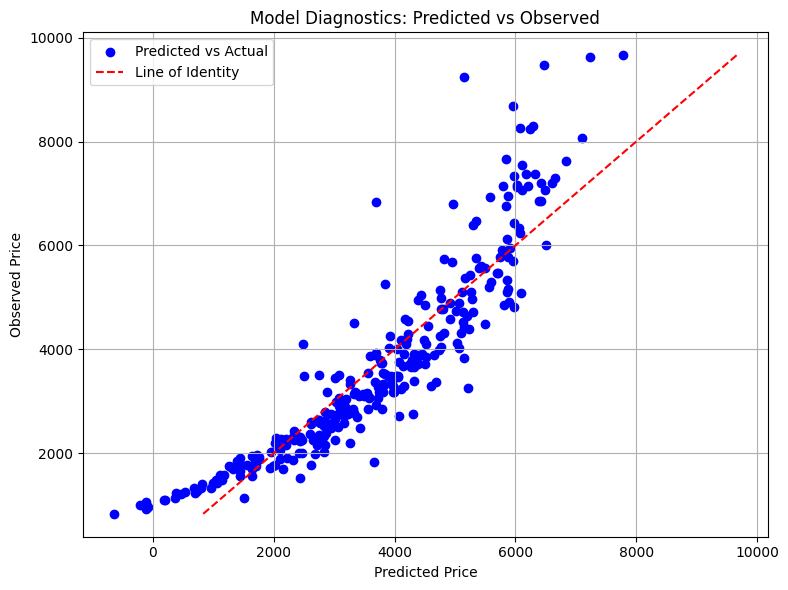

In [70]:
actual = y_test.values

plt.figure(figsize=(8, 6))
plt.scatter(predictions, actual, color='blue', label='Predicted vs Actual')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', label='Line of Identity')

plt.xlabel("Predicted Price")
plt.ylabel("Observed Price")
plt.title("Model Diagnostics: Predicted vs Observed")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In my line of work, we plot observed vs. predicted, and look at how much the observations (actual data) deviate vertically from the line of identity. I can see that in general the model predicts fairly well, except for the low (<2000) and high end (>6000). This isn't surprising - many models will deviate at the extreme ends. I would say this model is valid only for prices between 2000 and 6000. Actually if you do a formal stats linear regression and get the 5-95% CI bands, the band will be narrow in the middle and widen out on both ends.

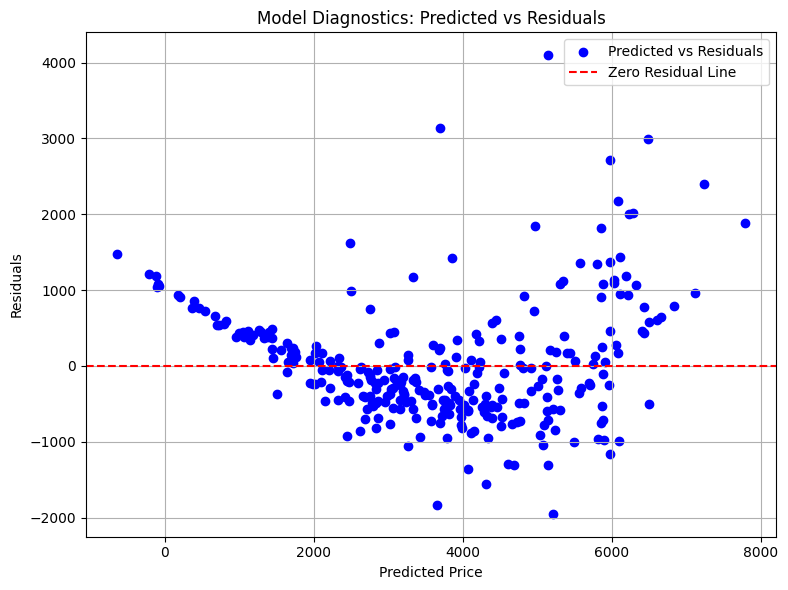

In [71]:
residuals=actual-predictions
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, color='blue', label='Predicted vs Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Model Diagnostics: Predicted vs Residuals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


We also look at residuals, just one of many diagnostic plots that we do. (We also look at weighted residuals vs. prediction, +many others) Here we see a bias in the residuals at the low end <1000, where the model tends to underpredict. The model also underpredicts at the high end >6000.

In [72]:
#what if qty=40, price=95, msrp=105
model.predict([[40, 95,105]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4576.53034282])

So the model tells us that all three variables (quantity, price, and msrp) are useful information in predicting the price. (This is also further verified below, where all 3 slope terms are statistically significant with p<<<0.01) The model is unreliable at the low and high ends, as it underpredicts. Yes, I would trust the model for making business predictions, but only in the middle ranges, ~2000 to ~6000.

Testing/Scratch

In [73]:
import statsmodels.api as sm
X = X_train
y = y_train

X = sm.add_constant(X) #intercept term
model1 = sm.OLS(y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     804.4
Date:                Mon, 24 Nov 2025   Prob (F-statistic):          5.45e-226
Time:                        06:05:32   Log-Likelihood:                -5765.9
No. Observations:                 702   AIC:                         1.154e+04
Df Residuals:                     698   BIC:                         1.156e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4990.6709    186.903    -